# **기본 모듈 준비**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, linewidth=500)
print(tf.__version__)

2.0.0


# **패션 MNIST 데이터셋 임포트하기**

### 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋 (각 이미지는 28x28 픽셀)

In [2]:
# Make 'fashion_mnist' module
dataSetModule = keras.datasets.fashion_mnist     # data set file will be downloaded to '~/.keras/datasets'
print('dataSetModule?', type(dataSetModule))

# Load Data as Numpy Array
(train_images, train_labels), (test_images, test_labels) = dataSetModule.load_data()

# Category
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Total Number of Image / Pixel Size
print('Training Image:', train_images.shape, type(train_images[0]))
print('Training Label:', train_labels.shape, type(train_labels[0]))

dataSetModule? <class 'module'>
Training Image: (60000, 28, 28) <class 'numpy.ndarray'>
Training Label: (60000,) <class 'numpy.uint8'>


## 데이터 확인

  Random Image = train_images[59594]
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0

     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0

     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0

     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0

     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0

     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     

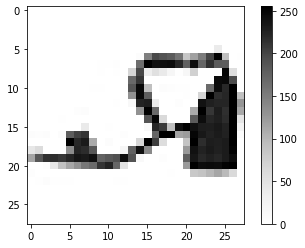

In [3]:
# Select a Random Image
from random import *
rndInt = randint(0,59999)
aImg = train_images[rndInt]
print('==========================================')
print('  Random Image = train_images[%d]'%(rndInt))
print('==========================================')

# Print the Selected Image as Numerical Matrix
for aRow in aImg:
    for aPixel in aRow:
        print('%6d'%(aPixel), end='')
    print('\n')

# Print the Selected Image as a Figure
plt.figure()
plt.imshow(aImg, cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

## 데이터 전처리


In [4]:
#%matplotlib tk
%matplotlib inline

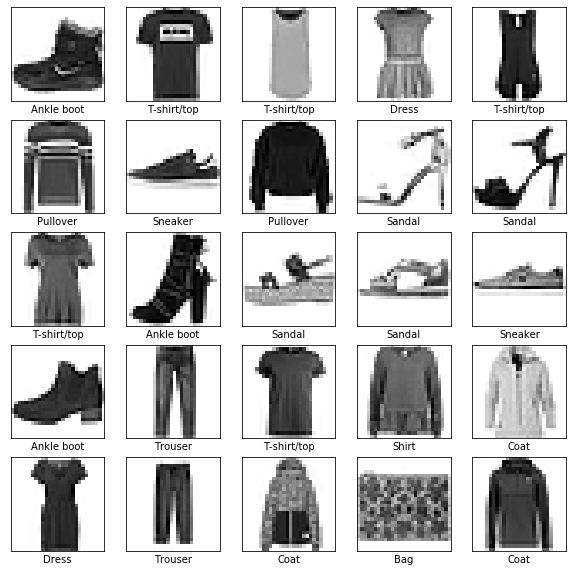

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 층 설정

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
print(type(model))
print(type(keras.layers.Flatten(input_shape=(28, 28))))
print(type(keras.layers.Dense(128, activation='relu')))
print('\n')
model.summary()

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
<class 'tensorflow.python.keras.layers.core.Flatten'>
<class 'tensorflow.python.keras.layers.core.Dense'>


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.071,  0.01 ,  0.055, ...,  0.058, -0.061, -0.02 ],
        [ 0.071,  0.012, -0.004, ..., -0.074, -0.009, -0.054],
        [-0.028,  0.064, -0.   , ...,  0.027, -0.037,  0.074],
        ...,
        [-0.068, -0.055, -0.008, ..., -0.069,  0.046,  0.022],
        [ 0.045,  0.018,  0.062, ..., -0.075, -0.071, -0.032],
        [ 0.046,  0.061, -0.033, ..., -0.062,  0.017, -0.021]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

## 모델 컴파일

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 검증 세트 만들기

In [9]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 모델 훈련

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 1s 28us/sample - loss: 0.7263 - accuracy: 0.7589 - val_loss: 0.5108 - val_accuracy: 0.8259
Epoch 2/30
50000/50000 [==============================] - 1s 14us/sample - loss: 0.4698 - accuracy: 0.8396 - val_loss: 0.4506 - val_accuracy: 0.8458
Epoch 3/30
50000/50000 [==============================] - 1s 13us/sample - loss: 0.4224 - accuracy: 0.8539 - val_loss: 0.4202 - val_accuracy: 0.8487
Epoch 4/30
50000/50000 [==============================] - 1s 14us/sample - loss: 0.3932 - accuracy: 0.8636 - val_loss: 0.3956 - val_accuracy: 0.8651
Epoch 5/30
50000/50000 [==============================] - 1s 13us/sample - loss: 0.3754 - accuracy: 0.8676 - val_loss: 0.3779 - val_accuracy: 0.8667
Epoch 6/30
50000/50000 [==============================] - 1s 14us/sample - loss: 0.3581 - accuracy: 0.8742 - val_loss: 0.3681 - val_accuracy: 0.8696
Epoch 7/30
50000/50000 [==============================] 

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

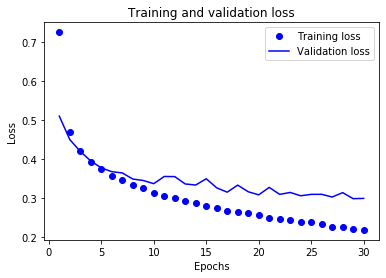

In [12]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

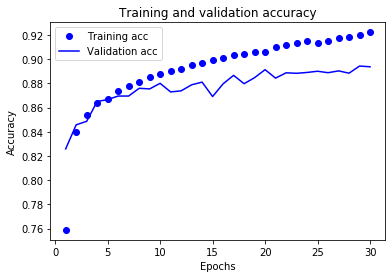

In [13]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 정확도 평가

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 1s - loss: 0.2522 - accuracy: 0.8852

테스트 정확도: 0.8852


## 예측 만들기

In [15]:
predictions = model.predict(test_images)

testIdx = randint(0,9999)
predIdx = np.argmax(predictions[testIdx])

print('Predicted Label:')
for idx, prediction in enumerate(predictions[testIdx]):
    if idx == predIdx:
        print('%d: %.2e <= most probable'%(idx, prediction))
    else:
        print('%d: %.2e'%(idx, prediction))

print('\nActual Label:', test_labels[testIdx])

Predicted Label:
0: 4.86e-06
1: 1.88e-08
2: 1.21e-06
3: 2.51e-07
4: 8.72e-07
5: 9.93e-01 <= most probable
6: 1.74e-06
7: 6.77e-03
8: 1.44e-05
9: 3.54e-04

Actual Label: 5


In [25]:
tf.nn.softmax(predictions)*100

<tf.Tensor: id=25723, shape=(10000, 10), dtype=float32, numpy=
array([[ 8.55 ,  8.55 ,  8.55 , ...,  8.611,  8.55 , 22.935],
       [ 8.538,  8.537, 23.144, ...,  8.537,  8.537,  8.537],
       [ 8.534, 23.196,  8.534, ...,  8.534,  8.534,  8.534],
       ...,
       [ 8.548,  8.539,  8.54 , ...,  8.539, 23.116,  8.539],
       [ 8.534, 23.191,  8.534, ...,  8.534,  8.534,  8.534],
       [ 8.542,  8.542,  8.542, ...,  8.595,  8.544,  8.542]], dtype=float32)>

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

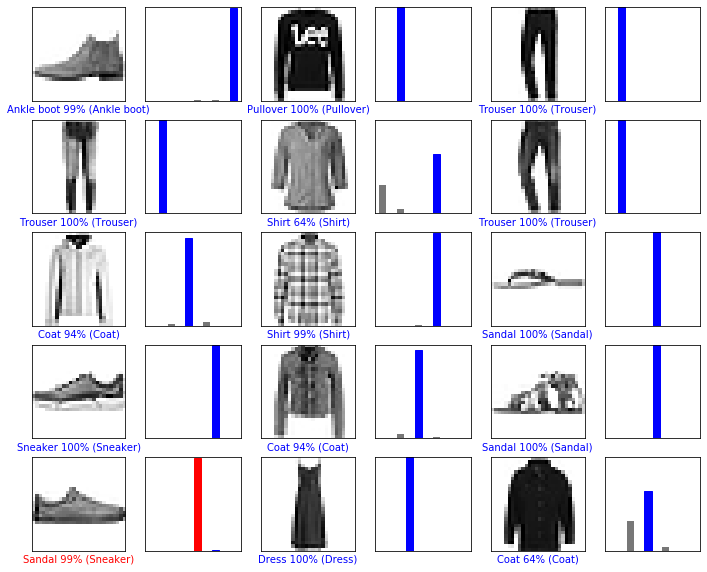

In [17]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

## 과대적합 (overfit) 방지를 위한 Dropout 추가

In [18]:
dropout_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

dropout_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

dropout_history = dropout_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 1s 24us/sample - loss: 0.8293 - accuracy: 0.7175 - val_loss: 0.5329 - val_accuracy: 0.8219
Epoch 2/30
50000/50000 [==============================] - 1s 20us/sample - loss: 0.5302 - accuracy: 0.8168 - val_loss: 0.4564 - val_accuracy: 0.8426
Epoch 3/30
50000/50000 [==============================] - 1s 13us/sample - loss: 0.4674 - accuracy: 0.8363 - val_loss: 0.4267 - val_accuracy: 0.8489
Epoch 4/30
50000/50000 [==============================] - 1s 12us/sample - loss: 0.4345 - accuracy: 0.8476 - val_loss: 0.3997 - val_accuracy: 0.8585
Epoch 5/30
50000/50000 [==============================] - 1s 12us/sample - loss: 0.4100 - accuracy: 0.8566 - val_loss: 0.3762 - val_accuracy: 0.8631
Epoch 6/30
50000/50000 [==============================] - 1s 13us/sample - loss: 0.3938 - accuracy: 0.8606 - val_loss: 0.3655 - val_accuracy: 0.8708
Epoch 7/30
50000/50000 [==============================] 

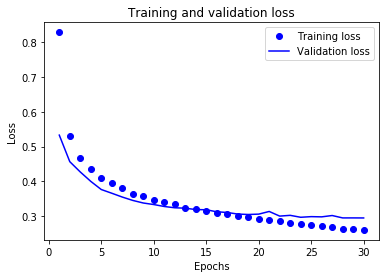

In [19]:
dropout_history_dict = dropout_history.history
dropout_history_dict.keys()

acc = dropout_history_dict['accuracy']
val_acc = dropout_history_dict['val_accuracy']
loss = dropout_history_dict['loss']
val_loss = dropout_history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

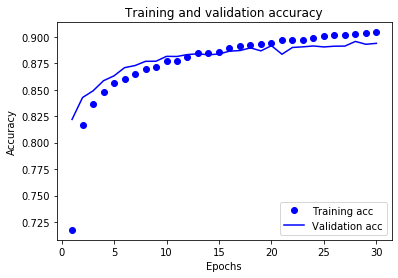

In [20]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
test_loss, test_acc = dropout_model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 0s - loss: 0.2321 - accuracy: 0.8854

테스트 정확도: 0.8854
